# Etudes des valeurs foncières Française
### Liens: https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

In [215]:
# Gather Latitude Longitude from Google Map (time/cost consuming)
add_lat_long = False

In [216]:
import numpy as np
import pandas as pd
import missingno as msno
import glob

#### Chargement du fichiers des valeurs foncières de 2018

In [217]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y') # 03/01/2018
def_types = {'Code postal': 'category', 'No voie': 'Int64'}

df = pd.read_csv('data/valeursfoncieres-2018.txt', sep='|', decimal=",", dtype=def_types, parse_dates=['Date mutation'], date_parser=dateparse)

In [218]:
all_files = glob.glob("data/*.txt")
#pd.concat((pd.read_csv(f, sep='|', decimal=",", dtype=def_types, parse_dates=['Date mutation'], date_parser=dateparse) for f in all_files))

In [219]:
df.describe()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.059537e+06,3.031420e+06,1.769221e+06,...,6335.000000,11113.000000,1679.000000,692.000000,3.059537e+06,1.600879e+06,0.0,1.598359e+06,1.598359e+06,2.113094e+06
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.226614e+00,8.052352e+05,7.686621e+02,...,86.268249,161.796995,120.495747,124.533757,3.887990e-01,2.001269e+00,NaN,8.908261e+01,2.420266e+00,3.142064e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.186802e+00,1.256333e+07,2.111660e+03,...,247.014792,2307.553061,370.563012,419.637928,8.309734e-01,9.494939e-01,NaN,7.226763e+02,2.095140e+00,1.470640e+04
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.500000e-01,1.000000e+00,...,0.400000,2.000000,0.400000,0.600000,0.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,5.500000e+04,8.000000e+00,...,39.310000,7.000000,37.000000,30.707500,0.000000e+00,1.000000e+00,NaN,1.200000e+01,0.000000e+00,2.370000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.420000e+05,2.500000e+01,...,61.690000,23.000000,67.000000,61.275000,0.000000e+00,2.000000e+00,NaN,6.000000e+01,3.000000e+00,6.280000e+02
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.570000e+05,9.800000e+01,...,88.520000,67.000000,106.740000,113.175000,1.000000e+00,3.000000e+00,NaN,9.400000e+01,4.000000e+00,1.935000e+03
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.620000e+02,1.256966e+09,9.999000e+03,...,8284.000000,161313.000000,4331.400000,8188.000000,3.300000e+02,4.000000e+00,NaN,2.778140e+05,9.000000e+01,4.625500e+06


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059537 entries, 0 to 3059536
Data columns (total 43 columns):
Code service CH               float64
Reference document            float64
1 Articles CGI                float64
2 Articles CGI                float64
3 Articles CGI                float64
4 Articles CGI                float64
5 Articles CGI                float64
No disposition                int64
Date mutation                 datetime64[ns]
Nature mutation               object
Valeur fonciere               float64
No voie                       Int64
B/T/Q                         object
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                   category
Commune                       object
Code departement              object
Code commune                  int64
Prefixe de section            float64
Section                       object
No plan                       int64
No Volume            

In [221]:
df.dtypes.value_counts()

float64           20
object            16
int64              4
category           1
Int64              1
datetime64[ns]     1
dtype: int64

#### Renomme les colonnes

In [222]:
import unidecode

columns = {}
for index, column_name in enumerate(df.columns):
    columns[column_name] = unidecode.unidecode(column_name.replace(' ','_').replace('\'','_').lower())
df.rename(columns=columns, inplace=True)

In [223]:
df.no_voie.value_counts()

1       75122
2       70061
3       56657
4       55704
5       50973
        ...  
2920        1
9946        1
6877        1
6947        1
4580        1
Name: no_voie, Length: 7019, dtype: int64

## Nettoyage des données simple

In [224]:
def missing_values_assessment(df):
    nan_values = df.isnull().sum().sum()
    print('Nombre d\'observations: {:,}'.format(len(df)))
    print('Nombre de valeurs: {:,}'.format(df.size))
    print('Valeurs manquantes: {:,}'.format(nan_values))
    print('Qualité des données: {}%'.format(100-round((nan_values/df.size)*100,2)))
    print('Type de données:\n {}%'.format(df.dtypes.value_counts()))
    analysis = {'Manquant': df.isnull().sum(),
                'Manquant %':round((df.isnull().sum()/len(df))*100, 2),
                'Type':df.dtypes
               }
    return pd.DataFrame(analysis)

#### Analyse des données manquantes

In [225]:
missing_values_assessment(df).sort_values('Manquant %', ascending=False)

Nombre d'observations: 3,059,537
Nombre de valeurs: 131,560,091
Valeurs manquantes: 75,853,849
Qualité des données: 42.34%
Type de données:
 float64           20
object            16
int64              4
category           1
Int64              1
datetime64[ns]     1
dtype: int64%


,Manquant,Manquant %,Type
code_service_ch,3059537,100.00,float64
4_articles_cgi,3059537,100.00,float64
reference_document,3059537,100.00,float64
5_articles_cgi,3059537,100.00,float64
identifiant_local,3059537,100.00,float64
3_articles_cgi,3059537,100.00,float64
2_articles_cgi,3059537,100.00,float64
1_articles_cgi,3059537,100.00,float64
surface_carrez_du_5eme_lot,3058845,99.98,float64
surface_carrez_du_4eme_lot,3057858,99.95,float64


In [226]:
df.code_postal=df.code_postal.apply(lambda x: '0{}'.format(x) if len(x)==4 else x)

#### Supression des colonnes sans données

In [227]:
# Drop NaN columns
orig_col = df.columns
df.dropna(how='all', axis=1, inplace=True)
print("Suppression de {} colonnes sans données:".format(len(orig_col)-len(df.columns)))
print([item for item in orig_col if item not in df.columns])

Suppression de 8 colonnes sans données:
['code_service_ch', 'reference_document', '1_articles_cgi', '2_articles_cgi', '3_articles_cgi', '4_articles_cgi', '5_articles_cgi', 'identifiant_local']


#### Suppression des lignes en double

In [228]:
df[df.duplicated(keep=False)]

,no_disposition,date_mutation,nature_mutation,valeur_fonciere,no_voie,b/t/q,type_de_voie,code_voie,voie,code_postal,...,5eme_lot,surface_carrez_du_5eme_lot,nombre_de_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,nature_culture,nature_culture_speciale,surface_terrain
212,1,2018-01-11,Vente,160000.0,3,NaN,PL,0082,DE LA RESISTANCE,01340,...,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,238.0
213,1,2018-01-11,Vente,160000.0,3,NaN,PL,0082,DE LA RESISTANCE,01340,...,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,238.0
287,1,2018-01-15,Vente,15000.0,5246,B,NaN,B050,COLIGNY LE HAUT,01270,...,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,92.0
288,1,2018-01-15,Vente,15000.0,5246,B,NaN,B050,COLIGNY LE HAUT,01270,...,NaN,NaN,0,3.0,Dépendance,0.0,0.0,S,NaN,92.0
318,1,2018-01-16,Vente,138000.0,18,NaN,RUE,0140,DOC SCHWEITZER,01000,...,NaN,NaN,0,2.0,Appartement,64.0,3.0,S,NaN,666.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059456,1,2018-12-21,Vente,33000000.0,11,NaN,PL,9917,DES VOSGES,75004,...,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,73.0,0.0,S,NaN,761.0
3059463,1,2018-12-21,Vente,33000000.0,11,NaN,PL,9917,DES VOSGES,75004,...,NaN,NaN,0,2.0,Appartement,40.0,2.0,S,NaN,761.0
3059464,1,2018-12-21,Vente,33000000.0,11,NaN,PL,9917,DES VOSGES,75004,...,NaN,NaN,0,2.0,Appartement,45.0,2.0,S,NaN,761.0
3059466,1,2018-12-21,Vente,33000000.0,11,NaN,PL,9917,DES VOSGES,75004,...,NaN,NaN,0,4.0,Local industriel. commercial ou assimilé,73.0,0.0,S,NaN,761.0


In [229]:
# Drop duplicates
initial_length = len(df)
df.drop_duplicates(inplace=True)
print("Suppression des doublons: {}".format(initial_length-len(df)))

Suppression des doublons: 108687


#### Suppression des colonnes sans intérêt pour notre étude

In [230]:
#df.drop(['voie', 'b/t/q'],axis=1, inplace=True)

# Référence cadastrale de la parcelle
df.drop(['code_departement', 'prefixe_de_section', 'section', 'no_plan'],axis=1, inplace=True) # Garde 'Code commune'

# No de disposition
df.drop(['no_disposition'],axis=1, inplace=True)
# No de volume
df.drop(['no_volume'],axis=1, inplace=True)

# Nature culture (référence à un document externe)
df.drop(['nature_culture_speciale', 'nature_culture'],axis=1, inplace=True)

# Suppression du 'Type local' en doublon avec le 'Code Type Local'
df.drop(['type_local'],axis=1, inplace=True)

# Suppression du 'Code voie'
df.drop(['code_voie'],axis=1, inplace=True)

# Suppression du 'No voie'
#df.drop(['no_voie'],axis=1, inplace=True)

# Suppression de la 'Date mutation'
#df.drop(['date_mutation'],axis=1, inplace=True)

# Suppression de la 'Code commune' en doublon avec la categorie 'Commune'
df.drop(['code_commune'],axis=1, inplace=True)
# Suppression de 'Commune' en doublon avec Commune
#df.drop(['code_postal'],axis=1, inplace=True)

# Suppression des 'lot' - !! A reintroduire après une 1ére analyse
df.drop(['5eme_lot'],axis=1, inplace=True)
df.drop(['4eme_lot'],axis=1, inplace=True)
df.drop(['3eme_lot'],axis=1, inplace=True)
df.drop(['2eme_lot'],axis=1, inplace=True)
df.drop(['1er_lot'],axis=1, inplace=True)

In [231]:
# Suppression des lignes où il n'y a pas de 'valeurs foncières'
indexNames = df[df['valeur_fonciere'].isnull()].index
df.drop(indexNames, inplace=True)

In [232]:
# Remplissage des mètres Carrez manquant avec zéro
#df = df[df['Nombre de lots']<=5].dropna(how='all', axis=1)
df['surface_carrez_du_5eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_4eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_3eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_2eme_lot'].fillna(0, inplace=True)
df['surface_carrez_du_1er_lot'].fillna(0, inplace=True)
df['surface_reelle_bati'].fillna(0, inplace=True)
df['surface_terrain'].fillna(0, inplace=True)

#### Analyse graphique des données manquantes

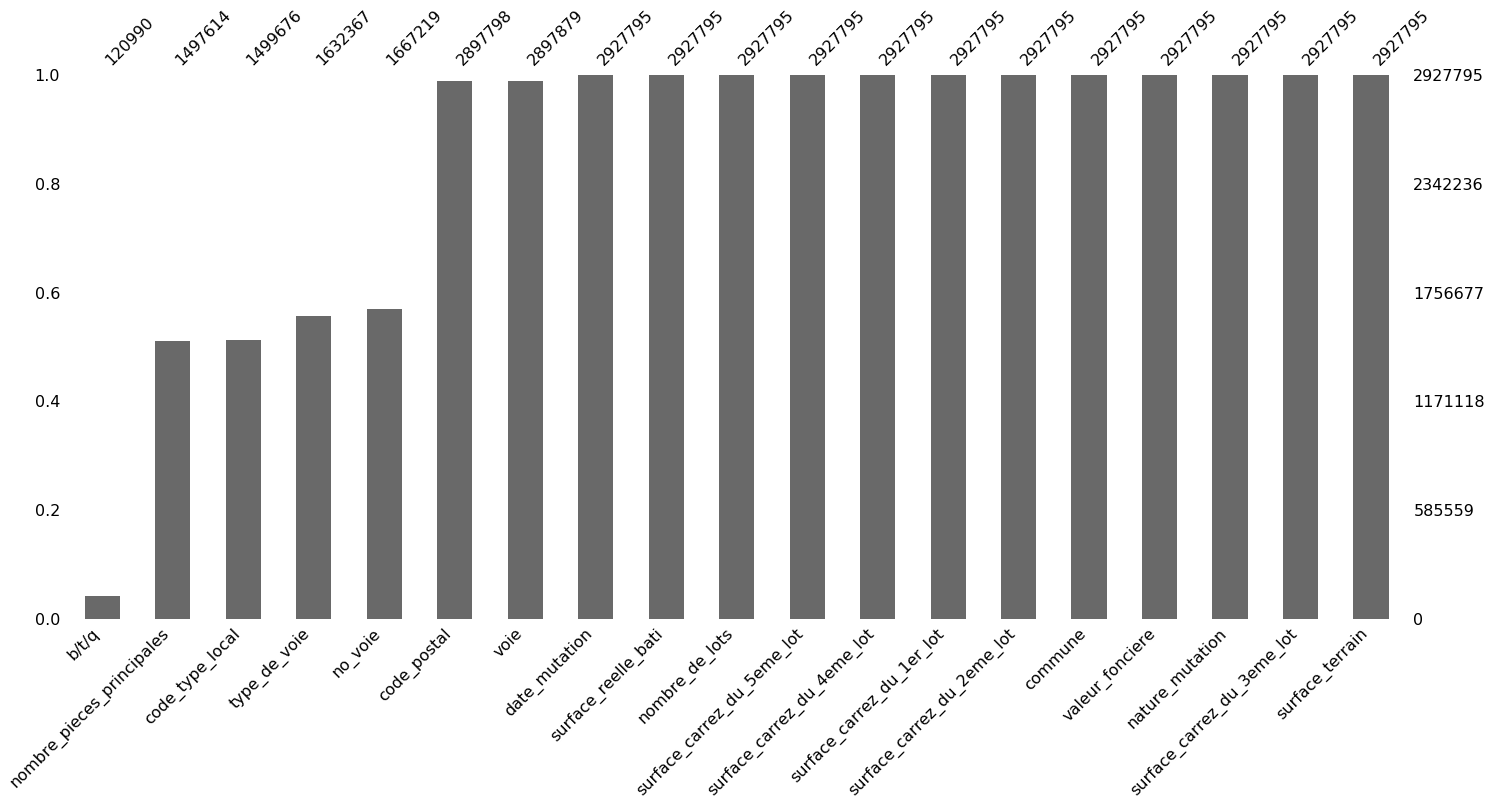

In [233]:
msno.bar(df, sort='ascending')

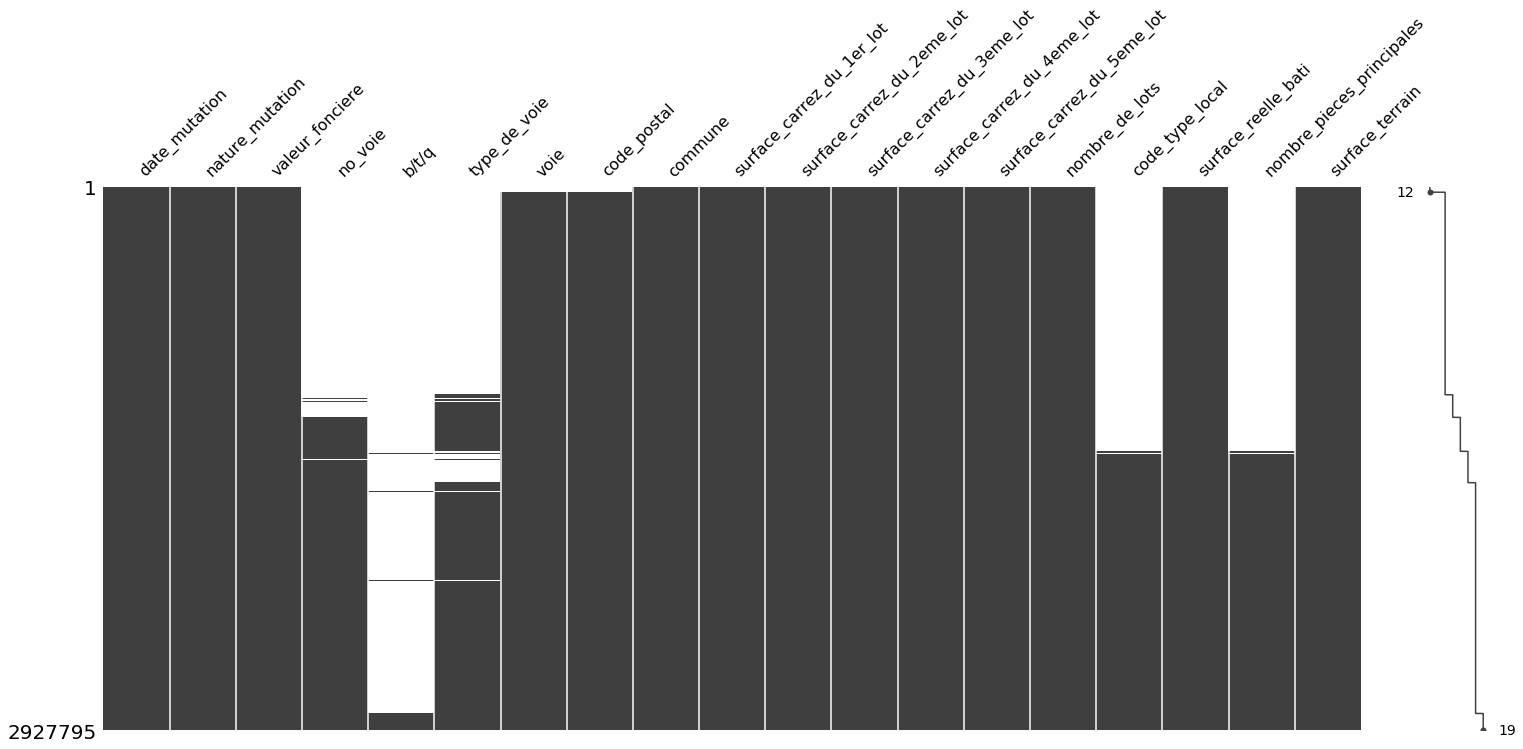

In [234]:
msno.matrix(df, sort='ascending')

## Nettoyage de données fonctionnels

In [235]:
## Formatage du code postal
df.code_postal=df.code_postal.apply(lambda x: '0{}'.format(x) if len(str(x))==4 else x)

In [236]:
category_cols = df.select_dtypes(include=['object','category'])

In [237]:
category_cols

,nature_mutation,b/t/q,type_de_voie,voie,code_postal,commune
0,Vente,NaN,RUE,GEN LOGEROT,01000,BOURG-EN-BRESSE
1,Vente,NaN,RUE,GEN LOGEROT,01000,BOURG-EN-BRESSE
2,Vente,NaN,RUE,DE LA BARMETTE,01250,NIVIGNE ET SURAN
3,Vente,NaN,RUE,DE LA BARMETTE,01250,NIVIGNE ET SURAN
4,Vente,NaN,RUE,DE LA BARMETTE,01250,NIVIGNE ET SURAN
...,...,...,...,...,...,...
3059532,Vente,NaN,RUE,DES LIONS SAINT PAUL,75004,PARIS 04
3059533,Vente,NaN,PAS,CHOISEUL,75002,PARIS 02
3059534,Vente,NaN,RUE,POISSONNIERE,75002,PARIS 02
3059535,Vente,NaN,RUE,STE CROIX BRETONNERIE,75004,PARIS 04


In [238]:
for cat in category_cols.columns:
    cat_val = df[cat].unique()
    print('{} ({}):'.format(cat,len(cat_val)))
    print('{}\n'.format(cat_val))

nature_mutation (6):
['Vente' "Vente en l'état futur d'achèvement" 'Echange'
 'Vente terrain à bâtir' 'Adjudication' 'Expropriation']

b/t/q (42):
[nan 'Z' 'B' 'A' 'T' 'C' 'G' 'D' 'Y' 'O' 'Q' 'H' 'U' 'V' 'E' 'L' '0' 'F'
 '9' 'J' 'K' 'M' 'N' 'P' 'R' '7' 'W' 'I' '4' '3' '-' '.' '5' 'X' '2' 'S'
 '1' '6' ',' '8' '/' '*']

type_de_voie (138):
['RUE' nan 'ALL' 'AV' 'RTE' 'PL' 'QUAI' 'BD' 'SEN' 'CHE' 'IMP' 'CHEM'
 'LOT' 'GR' 'CLOS' 'PAS' 'PROM' 'VC' 'RLE' 'CRS' 'MTE' 'MAIL' 'PLA' 'RES'
 'COUR' 'VIA' 'VOIE' 'ESPA' 'PONT' 'HAM' 'D' 'CITE' 'N' 'ZA' 'PTR' 'CAR'
 'PCH' 'FG' 'ZAC' 'CHS' 'RUET' 'PARC' 'SQ' 'RPE' 'CR' 'ESC' 'REM' 'VCHE'
 'COTE' 'PTE' 'ZI' 'CD' 'RPT' 'DOM' 'VGE' 'QUA' 'PASS' 'TRA' 'DIG' 'TOUR'
 'ESP' 'COR' 'ART' 'DSC' 'HLM' 'ILOT' 'ACH' 'CAMI' 'PAE' 'VALL' 'RAC'
 'VAL' 'BRTL' 'CALL' 'PTTE' 'VTE' 'RTD' 'MRN' 'PLE' 'VEN' 'GPL' 'VLA'
 'TRT' 'ENC' 'MAIS' 'TSSE' 'AUT' 'CAE' 'CTRE' 'ZONE' 'MAR' 'PLAG' 'RUIS'
 'HAB' 'DRA' 'CHV' 'PLAN' 'EMBR' 'PORT' 'BSN' 'BRG' 'CPG' 'LEVE' 'CC'
 'PRT' 'PLCI'

### Catégories

In [239]:
#df = pd.get_dummies(df, columns=['nature_mutation'])
#df = pd.get_dummies(df, columns=['type_de_voie'])

### Feature engineering Address

In [240]:
df['address']=(df['no_voie'].map(str).replace('nan','') +  ' ' + \
    df['b/t/q'].fillna('') +  ' ' + \
    df['type_de_voie'].fillna('') +  ' ' + \
    df['voie'].fillna('') +  ', ' + \
    df['code_postal'].astype('str').replace('nan','') +  ' ' + \
    df['commune'].fillna('')).str.strip()

In [241]:
# Drop the columns use to 
df.drop(['no_voie', 'b/t/q', 'voie', 'code_postal'],axis=1, inplace=True)

In [242]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import GoogleV3

cache_file = 'data/cache.dat'

def save_locations(df):
    df.to_csv(cache_file, index = None, header=True)

def load_locations():
    try:
        return pd.read_csv(cache_file)
    except:
        print('{} doesn\'t exist or is empty - creating a new dataframe'.format(cache_file))
        return pd.DataFrame(columns=['latitude','longitude','address', 'address_unformatted'])

with open('google_api_key.txt') as f:
    google_api_key = f.readline()

def add_locations(df, location, address):
    return df.append({'latitude':location.latitude,
               'longitude':location.longitude,
               'address':location.address,
                'address_unformatted':address},
              ignore_index=True)
    
def get_geocode(df, address):
    location = df[df['address_unformatted']==address]
    if not location.empty :
        return df, location
    #print('Address not in cache, requesting GeoPy')
    geopy = GoogleV3(api_key=google_api_key)
    try:
        location = geopy.geocode(address)
        df = add_locations(df, location, address)
    except Exception as e:
        print('Exception on address: {}'.format(address))
        traceback.print_exc()
    return df, location

In [244]:
if add_lat_long: 
    df['latitude'] = np.nan
    df.latitude = df.latitude.astype('float')
    df['longitude'] = np.nan
    df.longitude = df.longitude.astype('float')
    df['address_formatted'] = np.nan

In [245]:
if add_lat_long:
    for index, row in df.iterrows():
        address = row['address']
        #print('Searching address:{}'.format(row['address']))
        geolocation_df, location = get_geocode(geolocation_df, address)
        try:
            if location is not None:
                df.at[index, 'latitude'] = location.latitude
                df.at[index, 'longitude'] = location.longitude
                df.at[index, 'address_formatted'] = location.address
        except Exception as e:
            print('Exception on address [{}]: {}'.format(index, row['address']))
            traceback.print_exc()
        if index%100==0:
            print('Saving - index: {}'.format(index))
            save_locations(geolocation_df)

Exception on address [0]: 13  RUE GEN LOGEROT, 01000 BOURG-EN-BRESSE
Saving - index: 0


Traceback (most recent call last):
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'latitude'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2899, in _set_value
    series = self._get_item_cache(col)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 3270, in _get_item_cache
    values = se

Exception on address [1]: 13  RUE GEN LOGEROT, 01000 BOURG-EN-BRESSE


Traceback (most recent call last):
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'longitude'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2899, in _set_value
    series = self._get_item_cache(col)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 3270, in _get_item_cache
    values = s

Exception on address [2]: 4  RUE DE LA BARMETTE, 01250 NIVIGNE ET SURAN
Exception on address [3]: 4  RUE DE LA BARMETTE, 01250 NIVIGNE ET SURAN
Exception on address [4]: 4  RUE DE LA BARMETTE, 01250 NIVIGNE ET SURAN
Exception on address [5]: 4  RUE DE LA BARMETTE, 01250 NIVIGNE ET SURAN
Exception on address [6]: LE DRUILLET, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [7]: 5050   LE DRUILLET, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [8]: LE DRUILLET, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [9]: PONT D AIN, 01160 PONT-D AIN
Exception on address [10]: SOUS LE BOIS GIROUD, 01250 JASSERON
Exception on address [11]: 12  ALL DE LA PETITE REYSSOUZE, 01000 BOURG-EN-BRESSE
Exception on address [12]: 5  RUE MOLIERE, 01000 BOURG-EN-BRESSE
Exception on address [13]: VACAGNOLE, 01340 ATTIGNAT
Exception on address [14]: 50  RUE DOC NODET, 01000 BOURG-EN-BRESSE
Exception on address [15]: 50  RUE DOC NODET, 01000 BOURG-EN-BRESSE
Exception on address [16]: 30  AV JEAN JAURES, 0100

Traceback (most recent call last):
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas/_libs/index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'address_formatted'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2899, in _set_value
    series = self._get_item_cache(col)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 3270, in _get_item_cache
    va


Exception on address [100]: SAINT AMOUZE, 01250 MONTAGNAT
Saving - index: 100
Exception on address [101]: 1  RUE GEN DELESTRAINT, 01000 BOURG-EN-BRESSE
Exception on address [102]: 196  RTE DES FONTANETTES, 01340 FOISSIAT
Exception on address [103]: 196  RTE DES FONTANETTES, 01340 FOISSIAT
Exception on address [104]: FONTANETTES, 01340 FOISSIAT
Exception on address [105]: FONTANETTES, 01340 FOISSIAT
Exception on address [106]: FONTANETTES, 01340 FOISSIAT
Exception on address [107]: 5225   LES GRANGES MOUTONS, 01960 SERVAS
Exception on address [108]: 5225   LES GRANGES MOUTONS, 01960 SERVAS
Exception on address [109]: LA JOYEUSE, 01560 MANTENAY-MONTLIN
Exception on address [110]: LA JOYEUSE, 01560 MANTENAY-MONTLIN
Exception on address [111]: CURTY DE VILLE, 01560 MANTENAY-MONTLIN
Exception on address [112]: CURTY DE VILLE, 01560 MANTENAY-MONTLIN
Exception on address [113]: CHENET, 01560 CURCIAT-DONGALON
Exception on address [114]: PRE JOMENE, 01160 NEUVILLE-SUR-AIN
Exception on address 

  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self


Exception on address [163]: AUX COUPES, 01380 BAGE-DOMMARTIN
Exception on address [164]: LE VILLAGE - CHAVANNES, 01250 NIVIGNE ET SURAN
Exception on address [165]: LE VILLAGE - CHAVANNES, 01250 NIVIGNE ET SURAN
Exception on address [166]: LE VILLAGE - CHAVANNES, 01250 NIVIGNE ET SURAN
Exception on address [167]: 12  SEN DE L ALAMBIC, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [168]: MOINANS, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [169]: 10  RUE GABRIEL VICAIRE, 01000 BOURG-EN-BRESSE
Exception on address [170]: 10  RUE GABRIEL VICAIRE, 01000 BOURG-EN-BRESSE
Exception on address [171]: 10  RUE GABRIEL VICAIRE, 01000 BOURG-EN-BRESSE
Exception on address [172]: 140  RUE DES TUPINIERES, 01560 SAINT-JULIEN-SUR-REYSSOUZE
Exception on address [173]: 3  RUE TEYNIERE, 01000 BOURG-EN-BRESSE
Exception on address [174]: 25  RUE DES LAZARISTES, 01000 BOURG-EN-BRESSE
Exception on address [175]: 25  RUE DES LAZARISTES, 01000 BOURG-EN-BRESSE
Exception on address [176]: 25  RUE DES LAZARI

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [206]: LES NOYERS, 01560 SAINT-NIZIER-LE-BOUCHOUX
Exception on address [207]: 5288   LES NOYERS, 01560 SAINT-NIZIER-LE-BOUCHOUX
Exception on address [208]: LA CHANLIARDE, 01190 ST ETIENNE-SUR-REYSSOUZE
Exception on address [209]: CROZET, 01340 ATTIGNAT
Exception on address [210]: 3  PL DE LA RESISTANCE, 01340 MONTREVEL-EN-BRESSE
Exception on address [211]: 3  PL DE LA RESISTANCE, 01340 MONTREVEL-EN-BRESSE
Exception on address [212]: 3  PL DE LA RESISTANCE, 01340 MONTREVEL-EN-BRESSE
Exception on address [214]: BALVAY, 01340 CRAS-SUR-REYSSOUZE
Exception on address [215]: BALVAY, 01340 CRAS-SUR-REYSSOUZE
Exception on address [216]: BALVAY, 01340 CRAS-SUR-REYSSOUZE
Exception on address [217]: 388  RTE DE ST JEAN, 01340 MARSONNAS
Exception on address [218]: 388  RTE DE ST JEAN, 01340 MARSONNAS
Exception on address [219]: LE MOLLARD, 01340 MARSONNAS
Exception on address [220]: LE MOLLARD, 01340 MARSONNAS
Exception on address [221]: AUX PLATIERES, 01290 SAINT-ANDRE-D HUIR

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [256]: 550  ALL DES FAUVETTES, 01340 ATTIGNAT
Exception on address [257]: LA POLLIAT, 01160 SAINT-MARTIN-DU-MONT
Exception on address [258]: 10  CHE DE LA BUCLAINE, 01160 SAINT-MARTIN-DU-MONT
Exception on address [259]: LA POLLIAT, 01160 SAINT-MARTIN-DU-MONT
Exception on address [260]: PRE BIGOT, 01160 PONT-D AIN
Exception on address [261]: PRE BIGOT, 01160 PONT-D AIN
Exception on address [262]: PRE BIGOT, 01160 PONT-D AIN
Exception on address [263]: 56  RUE DE MONTHOLON, 01000 BOURG-EN-BRESSE
Exception on address [264]: 30 B RUE DU 23EME R.I., 01000 BOURG-EN-BRESSE
Exception on address [265]: 451  RUE JEAN MERMOZ, 01960 PERONNAS
Exception on address [266]: 451  RUE JEAN MERMOZ, 01960 PERONNAS
Exception on address [267]: 451  RUE JEAN MERMOZ, 01960 PERONNAS
Exception on address [268]: BARBERIES, 01570 MANZIAT
Exception on address [269]: 5198   BARBERIES, 01570 MANZIAT
Exception on address [270]: AUX GRANDES MANGETTES, 01370 SAINT-ETIENNE-DU-BOIS
Exception on addre

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [314]: 121  RUE THOMAS RIBOUD, 01250 JASSERON
Exception on address [315]: 121  RUE THOMAS RIBOUD, 01250 JASSERON
Exception on address [316]: 46  LOT LES JACQUEMINS, 01370 SAINT-ETIENNE-DU-BOIS
Exception on address [317]: 6  ALL DE LA PETITE REYSSOUZE, 01000 BOURG-EN-BRESSE
Exception on address [318]: 18  RUE DOC SCHWEITZER, 01000 SAINT-DENIS-LES-BOURG
Exception on address [320]: MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [321]: MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [322]: MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [323]: MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [324]: MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [325]: MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [326]: MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [327]: 5060   MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [328]: MONTCROZIER, 01380 BAGE-DOMMARTIN
Exception on address [329]: MONTCROZIER, 01380 BAGE-DOMMARTI

  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = l


Exception on address [376]: BRAS DE MER, 01440 VIRIAT
Exception on address [377]: CURTETRELLE, 01190 CHEVROUX
Exception on address [378]: CURTETRELLE, 01190 CHEVROUX
Exception on address [379]: CURTETRELLE, 01190 CHEVROUX
Exception on address [380]: PRES MOREAUX, 01370 VAL-REVERMONT
Exception on address [381]: ATTIGNAT VILLAGE, 01340 ATTIGNAT
Exception on address [382]: 211  GR GRANDE RUE, 01340 ATTIGNAT
Exception on address [383]: 211  GR GRANDE RUE, 01340 ATTIGNAT
Exception on address [384]: ATTIGNAT VILLAGE, 01340 ATTIGNAT
Exception on address [385]: 1785 T GR GRANDE RUE, 01570 FEILLENS
Exception on address [386]: 1195  RTE DU BOIS PERRON, 01560 LESCHEROUX
Exception on address [387]: BOIS PERRONS, 01560 LESCHEROUX
Exception on address [388]: BOIS PERRONS, 01560 LESCHEROUX
Exception on address [389]: BOIS PERRONS, 01560 LESCHEROUX
Exception on address [390]: 40  CHE DE LA BERGADERIE, 01370 SAINT-ETIENNE-DU-BOIS
Exception on address [391]: 40  CHE DE LA BERGADERIE, 01370 SAINT-ETIENN

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [443]: LE FORT, 01440 VIRIAT
Exception on address [444]: 13  LOT CLOS DES MOISSONS, 01340 JAYAT
Exception on address [445]: LES ECORCHEUX, 01160 DRUILLAT
Exception on address [446]: ETANG FERRA, 01160 LA TRANCLIERE
Exception on address [447]: 16  RUE TONY FERRET, 01000 BOURG-EN-BRESSE
Exception on address [448]: 18  ALL DES TROENES, 01960 PERONNAS
Exception on address [449]: AUX FROIDIERES, 01270 COLIGNY
Exception on address [450]: AUX FROIDIERES, 01270 COLIGNY
Exception on address [451]: LES VERGERETS, 01270 COLIGNY
Exception on address [453]: LES VERGERETS, 01270 COLIGNY
Exception on address [454]: LES VERGERETS, 01270 COLIGNY
Exception on address [455]: LES BEYS, 01570 FEILLENS
Exception on address [456]: LES BEYS, 01570 FEILLENS
Exception on address [457]: 110  RUE DU PRE PAQUIER, 01750 SAINT-LAURENT-SUR-SAONE
Exception on address [458]: 110  RUE DU PRE PAQUIER, 01750 SAINT-LAURENT-SUR-SAONE
Exception on address [459]: VERCHERES, 01290 CRUZILLES-LES-MEPILLAT
E

  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self

Exception on address [492]: VILLAGE, 01250 JASSERON
Exception on address [493]: VILLAGE, 01250 JASSERON
Exception on address [494]: LES FOURNILS, 01250 JASSERON
Exception on address [495]: VILLAGE, 01250 JASSERON
Exception on address [496]: LE DESERT, 01250 CEYZERIAT
Exception on address [497]: LE DESERT, 01250 CEYZERIAT
Exception on address [498]: LES AYES, 01250 SAINT-JUST
Exception on address [499]: 8  LOT LOTISSEMENT LA CROIX, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [500]: 17  RUE DES TILLEULS, 01240 LENT
Saving - index: 500
Exception on address [501]: 1  PAS DU CHAMP DE LA VILLE, 01240 LENT
Exception on address [502]: 857  RTE DE CHANTERENARD, 01160 DRUILLAT
Exception on address [503]: TURGON, 01160 DRUILLAT
Exception on address [504]: VERS VEAU, 01160 DRUILLAT
Exception on address [505]: VERS VEAU, 01160 DRUILLAT
Exception on address [506]: VERS VEAU, 01160 DRUILLAT
Exception on address [507]: 7  RUE DU VERNAY, 01160 PONT-D AIN
Exception on address [508]: 7  RUE DU VERNAY,

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [528]: LE SORBIER, 01340 MARSONNAS
Exception on address [529]: LE ROCHET, 01340 MARSONNAS
Exception on address [530]: LE BOURG DERNIER, 01270 DOMSURE
Exception on address [531]: MARILLAT, 01440 VIRIAT
Exception on address [532]: MARILLAT, 01440 VIRIAT
Exception on address [533]: LA GENETE, 01310 POLLIAT
Exception on address [534]: 39  AV AMEDEE MERCIER, 01000 BOURG-EN-BRESSE
Exception on address [535]: 39  AV AMEDEE MERCIER, 01000 BOURG-EN-BRESSE
Exception on address [536]: 39  AV AMEDEE MERCIER, 01000 BOURG-EN-BRESSE
Exception on address [537]: LE BOURG, 01190 PONT-DE-VAUX
Exception on address [538]: 5246  RTE DE FLEURVILLE, 01190 PONT-DE-VAUX
Exception on address [539]: 1  RUE ANDRE, 01190 PONT-DE-VAUX
Exception on address [540]: 178  RTE DE LORIOL, 01310 CONFRANCON
Exception on address [541]: 178  RTE DE LORIOL, 01310 CONFRANCON
Exception on address [542]: VERNAY EST, 01190 REYSSOUZE
Exception on address [543]: 269  CHE DES LOZIERES, 01190 REYSSOUZE
Exception o

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [588]: RIVET, 01270 DOMSURE
Exception on address [589]: RIVET, 01270 DOMSURE
Exception on address [590]: EN BAUDET, 01270 DOMSURE
Exception on address [591]: LES CLAPIERS, 01000 SAINT-DENIS-LES-BOURG
Exception on address [592]: LES CLAPIERS, 01000 SAINT-DENIS-LES-BOURG
Exception on address [593]: 12  PL JOUBERT, 01190 PONT-DE-VAUX
Exception on address [594]: 1267  AV DE LYON, 01960 PERONNAS
Exception on address [595]: 1267  AV DE LYON, 01960 PERONNAS
Exception on address [596]: 56  CHE RURAL DIT DE LA CROIX, 01160 VARAMBON
Exception on address [597]: 56  CHE RURAL DIT DE LA CROIX, 01160 VARAMBON
Exception on address [598]: LA MAGDELEINE, 01160 VARAMBON
Exception on address [599]: 37  AV AMEDEE MERCIER, 01000 BOURG-EN-BRESSE
Exception on address [600]: 8  RUE DES CERISIERS, 01000 BOURG-EN-BRESSE
Saving - index: 600
Exception on address [601]: LE VILLAGE, 01270 VERJON
Exception on address [602]: BALVAY, 01340 CRAS-SUR-REYSSOUZE
Exception on address [603]: BALVAY, 013

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [654]: 2766  CHE DE TANVOL, 01440 VIRIAT
Exception on address [655]: 401   LA PRESLE, 01310 BUELLAS
Exception on address [656]: 401   LA PRESLE, 01310 BUELLAS
Exception on address [657]: LA VIGNE, 01440 VIRIAT
Exception on address [658]: 2  RUE DU CORDIER, 01000 BOURG-EN-BRESSE
Exception on address [659]: 48  ALL EDOUARD MANET, 01000 BOURG-EN-BRESSE
Exception on address [660]: 45  IMP DE LA MONTAGNE, 01310 MONTRACOL
Exception on address [661]: 9 B RUE GEN DELESTRAINT, 01000 BOURG-EN-BRESSE
Exception on address [662]: 9 B RUE GEN DELESTRAINT, 01000 BOURG-EN-BRESSE
Exception on address [663]: 10  RUE DE LA LIBERTE, 01000 BOURG-EN-BRESSE
Exception on address [664]: 10  RUE DE LA LIBERTE, 01000 BOURG-EN-BRESSE
Exception on address [665]: 10  RUE DE LA LIBERTE, 01000 BOURG-EN-BRESSE
Exception on address [666]: CHAMP DE L ECHALLIER, 01250 SIMANDRE-SUR-SURAN
Exception on address [667]: COTES LAURENT, 01160 NEUVILLE-SUR-AIN
Exception on address [668]: COTES LAURENT, 01160

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [696]: PRE CARNIER, 01560 CORMOZ
Exception on address [697]: 519  CHE DES BRESSANS, 01370 COURMANGOUX
Exception on address [698]: 519  CHE DES BRESSANS, 01370 COURMANGOUX
Exception on address [699]: 519  CHE DES BRESSANS, 01370 COURMANGOUX
Exception on address [700]: 30  CHE DES CURTILS, 01340 MONTREVEL-EN-BRESSE
Saving - index: 700
Exception on address [701]: MONTCINDROUX, 01340 MARSONNAS
Exception on address [702]: PRE LONG, 01340 MARSONNAS
Exception on address [703]: MONTCINDROUX, 01340 MARSONNAS
Exception on address [704]: BEVY, 01340 MARSONNAS
Exception on address [705]: LES PLATIERES, 01340 MARSONNAS
Exception on address [706]: LES PLATIERES, 01340 MARSONNAS
Exception on address [707]: LES PLATIERES, 01340 MARSONNAS
Exception on address [708]: CROIX BLANCHET, 01340 MARSONNAS
Exception on address [709]: LES CRUFS, 01340 MARSONNAS
Exception on address [710]: LE BUCHET, 01340 MARSONNAS
Exception on address [711]: LE BUCHET, 01340 MARSONNAS
Exception on address [

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [720]: LE VILLAGE, 01250 HAUTECOURT-ROMANECHE
Exception on address [721]: LA BATTIERE, 01270 VERJON
Exception on address [722]: 4  PL PIERRE GOUJON, 01000 BOURG-EN-BRESSE
Exception on address [723]: 4  PL PIERRE GOUJON, 01000 BOURG-EN-BRESSE
Exception on address [724]: AUX TERRES, 01540 PERREX
Exception on address [725]: AUX VANNIERS, 01190 CHAVANNES-SUR-REYSSOUZE
Exception on address [726]: AUX VANNIERS, 01190 CHAVANNES-SUR-REYSSOUZE
Exception on address [727]: AUX VANNIERS, 01190 CHAVANNES-SUR-REYSSOUZE
Exception on address [728]: AUX VANNIERS, 01190 CHAVANNES-SUR-REYSSOUZE
Exception on address [729]: EN LOURDON, 01380 BAGE-DOMMARTIN
Exception on address [730]: EN LOURDON, 01380 BAGE-DOMMARTIN
Exception on address [731]: EN LOURDON, 01380 BAGE-DOMMARTIN
Exception on address [732]: 134  IMP PETIT BADEL, 01380 BAGE-DOMMARTIN
Exception on address [733]: 134  IMP PETIT BADEL, 01380 BAGE-DOMMARTIN
Exception on address [734]: 110  RTE DES SIGNOLLES, 01340 CRAS-SUR-REY

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [778]: 176  ALL DE CHEVERNY, 01960 PERONNAS
Exception on address [779]: 176  ALL DE CHEVERNY, 01960 PERONNAS
Exception on address [780]: 176  ALL DE CHEVERNY, 01960 PERONNAS
Exception on address [781]: 180  RUE DES NOISETIERS, 01000 SAINT-DENIS-LES-BOURG
Exception on address [782]: 180  RUE DES NOISETIERS, 01000 SAINT-DENIS-LES-BOURG
Exception on address [783]: 180  RUE DES NOISETIERS, 01000 SAINT-DENIS-LES-BOURG
Exception on address [784]: 5  BD VICTOR HUGO, 01000 BOURG-EN-BRESSE
Exception on address [785]: 18  RUE DE LA GRENOUILLERE, 01000 BOURG-EN-BRESSE
Exception on address [786]: 18 B RUE DE LA GRENOUILLERE, 01000 BOURG-EN-BRESSE
Exception on address [787]: 13  ALL FELICIEN PROUST, 01000 BOURG-EN-BRESSE
Exception on address [788]: 13  ALL FELICIEN PROUST, 01000 BOURG-EN-BRESSE
Exception on address [789]: 13  ALL FELICIEN PROUST, 01000 BOURG-EN-BRESSE
Exception on address [790]: 10 B RUE CHARLES TARDY, 01000 BOURG-EN-BRESSE
Exception on address [791]: 10 B RUE 

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [816]: LES JORDES, 01560 CORMOZ
Exception on address [817]: 5  RUE ROBERT SCHUMAN, 01000 BOURG-EN-BRESSE
Exception on address [818]: 5487  RUE DE L HOMONT, 01340 MALAFRETAZ
Exception on address [819]: MAS DU LAIT, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [820]: 1191   MAS DU LAIT, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [821]: 27  RUE MAL FOCH, 01000 BOURG-EN-BRESSE
Exception on address [822]: 20  RUE GAMBETTA, 01000 BOURG-EN-BRESSE
Exception on address [823]: 23  RUE DU QUATRE SEPTEMBRE, 01000 BOURG-EN-BRESSE
Exception on address [824]: 23  RUE DU QUATRE SEPTEMBRE, 01000 BOURG-EN-BRESSE
Exception on address [825]: 86  RUE MAL DE LATTRE DE TASSIGNY, 01190 PONT-DE-VAUX
Exception on address [826]: LES GRANDS COURS, 01851 MARBOZ
Exception on address [827]: 5609   LES GRANDS COURS, 01851 MARBOZ
Exception on address [828]: 5609   LES GRANDS COURS, 01851 MARBOZ
Exception on address [829]: LES GRANDS COURS, 01851 MARBOZ
Exception on address [830]: GRAND TAIL

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [847]: LES PLANS, 01250 CEYZERIAT
Exception on address [848]: LES PLANS, 01250 CEYZERIAT
Exception on address [849]: 3  RUE D YPRES, 01000 BOURG-EN-BRESSE
Exception on address [850]: 284  CHE DU TRAVERSANT, 01190 REYSSOUZE
Exception on address [851]: 3  RUE ANDRE, 01190 PONT-DE-VAUX
Exception on address [852]: BRACANIERE, 01340 SAINT-SULPICE
Exception on address [853]: BRACANIERE, 01340 SAINT-SULPICE
Exception on address [854]: BRACANIERE, 01340 SAINT-SULPICE
Exception on address [855]: 316  CHE DE LA TEPPE, 01340 SAINT-SULPICE
Exception on address [856]: BRACANIERE, 01340 SAINT-SULPICE
Exception on address [857]: BRACANIERE, 01340 SAINT-SULPICE
Exception on address [858]: BRACANIERE, 01340 SAINT-SULPICE
Exception on address [859]: BRACANIERE, 01340 SAINT-SULPICE
Exception on address [860]: BRACANIERE, 01340 SAINT-SULPICE
Exception on address [861]: 5072   MONTRIN, 01190 SAINT-BENIGNE
Exception on address [862]: 14  RUE CREVE COEUR, 01000 BOURG-EN-BRESSE
Exception 

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [951]: AU VILLARD, 01270 SALAVRE
Exception on address [952]: AU VILLARD, 01270 SALAVRE
Exception on address [953]: AU VILLARD, 01270 SALAVRE
Exception on address [954]: BOYER, 01560 MANTENAY-MONTLIN
Exception on address [955]: 536  CHE DE BOYER, 01560 MANTENAY-MONTLIN
Exception on address [956]: LE VILLAGE - GERMAGNAT, 01250 NIVIGNE ET SURAN
Exception on address [957]: LES VERGERS, 01250 NIVIGNE ET SURAN
Exception on address [958]: AUX VERNES, 01370 COURMANGOUX
Exception on address [959]: AUX VERNES, 01370 COURMANGOUX
Exception on address [960]: AUX VERNES, 01370 COURMANGOUX
Exception on address [961]: AUX VERNES, 01370 COURMANGOUX
Exception on address [962]: LE BOURG, 01190 CHEVROUX
Exception on address [963]: 26  RUE FRANCOIS ARAGO, 01000 BOURG-EN-BRESSE
Exception on address [964]: SOTTISON, 01310 CONFRANCON
Exception on address [965]: 27  CHE DE SOTTIZON, 01310 CONFRANCON
Exception on address [966]: BOISSEY, 01290 CRUZILLES-LES-MEPILLAT
Exception on address [96

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address: 103  CHE DES POULATTES, 01310 POLLIAT
Exception on address [973]: 7  IMP DU TRONCHAY, 01340 BEREZIAT
Exception on address [974]: 8  AV LOUIS JOURDAN, 01000 BOURG-EN-BRESSE
Exception on address [975]: 8  AV LOUIS JOURDAN, 01000 BOURG-EN-BRESSE
Exception on address [976]: 9  RUE DE FRANCHE COMTE, 01000 BOURG-EN-BRESSE
Exception on address [977]: 116  CHE DES CHAMPEYS, 01310 POLLIAT
Exception on address [978]: 116  CHE DES CHAMPEYS, 01310 POLLIAT
Exception on address [979]: LA GENETE, 01310 POLLIAT
Exception on address [980]: TERRES FORTES, 01560 CORMOZ
Exception on address [981]: CLERMONT, 01340 SAINT-DIDIER-D AUSSIAT
Exception on address [982]: CLERMONT, 01340 SAINT-DIDIER-D AUSSIAT
Exception on address [983]: 2380  CHE DES BOIS DE LHU, 01340 SAINT-DIDIER-D AUSSIAT
Exception on address [984]: ETANG LALLAGNE, 01310 POLLIAT
Exception on address [985]: EN FAYOLLET, 01310 POLLIAT
Exception on address [986]: EN FAYOLLET, 01310 POLLIAT
Exception on address [987]: EN SERV

Traceback (most recent call last):
  File "<ipython-input-242-97986ead690e>", line 34, in get_geocode
    df = add_locations(df, location, address)
  File "<ipython-input-242-97986ead690e>", line 20, in add_locations
    return df.append({'latitude':location.latitude,
AttributeError: 'NoneType' object has no attribute 'latitude'
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
Valu


Exception on address [1041]: VERS LE VIEUDRIN, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1042]: LA TARQUE, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1043]: LA TARQUE, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1044]: LA TARQUE, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1045]: LA TARQUE, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1046]: LA TARQUE, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1047]: LA TARQUE, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1048]: LES COURBES, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1049]: LES COURBES, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1050]: LES COURBES, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1051]: LES COURBES, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1052]: LES COURBES, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1053]: LES COURBES, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1054]: LES COURBES, 01250 BOHAS-MEYRIAT-RIGNAT
Exception on address [1055]: LES COURBES

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [1083]: BASSEMENT SUD, 01160 NEUVILLE-SUR-AIN
Exception on address [1084]: 9  RUE JULES MIGONNEY, 01000 BOURG-EN-BRESSE
Exception on address [1085]: 9  RUE JULES MIGONNEY, 01000 BOURG-EN-BRESSE
Exception on address [1086]: 9  RUE JULES MIGONNEY, 01000 BOURG-EN-BRESSE
Exception on address [1087]: LOGIS NEUF, 01310 CONFRANCON
Exception on address [1088]: FENIOUX, 01310 CONFRANCON
Exception on address [1089]: FENIOUX, 01310 CONFRANCON
Exception on address [1090]: FENIOUX, 01310 CONFRANCON
Exception on address [1091]: 5402   FENIOUX, 01310 CONFRANCON
Exception on address [1092]: FENIOUX, 01310 CONFRANCON
Exception on address [1093]: FENIOUX, 01310 CONFRANCON
Exception on address [1094]: FENIOUX, 01310 CONFRANCON
Exception on address [1095]: 123 B RUE DE LA CHENAIE, 01310 CONFRANCON
Exception on address [1096]: FENIOUX, 01310 CONFRANCON
Exception on address [1097]: 140  CHEM DU GOUR, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1305]: 240  RUE RUE    DE LA POSTE, 013

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [1353]: 65  ALL DES DOUVRES, 01240 CERTINES
Exception on address [1354]: 65  ALL DES DOUVRES, 01240 CERTINES
Exception on address [1355]: SAINT LAURENT DES SABLES, 01570 MANZIAT
Exception on address [1356]: SAINT LAURENT DES SABLES, 01570 MANZIAT
Exception on address [1357]: SAINT LAURENT DES SABLES, 01570 MANZIAT
Exception on address [1358]: SAINT LAURENT DES SABLES, 01570 MANZIAT
Exception on address [1359]: 26  AV DES ANCIENS COMBATTANTS, 01000 BOURG-EN-BRESSE
Exception on address [1360]: 26  AV DES ANCIENS COMBATTANTS, 01000 BOURG-EN-BRESSE
Exception on address [1361]: BOURBOUILLON, 01250 CEYZERIAT
Exception on address [1362]: 79  GR GRANDE RUE, 01290 PONT-DE-VEYLE
Exception on address [1363]: 79  GR GRANDE RUE, 01290 PONT-DE-VEYLE
Exception on address [1364]: SAINT LAURENT DES SABLES, 01570 MANZIAT
Exception on address [1365]: SAINT LAURENT DES SABLES, 01570 MANZIAT
Exception on address [1366]: SAINT LAURENT DES SABLES, 01570 MANZIAT
Exception on address [1367

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [1395]: LES COMBES, 01310 MONTCET
Exception on address [1396]: LES NANCES, 01310 MONTCET
Exception on address [1397]: CORMORAND, 01250 VILLEREVERSURE
Exception on address [1398]: CORMORAND, 01250 VILLEREVERSURE
Exception on address [1399]: 11  RTE DE CORMORAND, 01250 VILLEREVERSURE
Exception on address [1400]: CORMORAND, 01250 VILLEREVERSURE
Saving - index: 1400
Exception on address [1401]: CORMORAND, 01250 VILLEREVERSURE
Exception on address [1402]: CORMORAND, 01250 VILLEREVERSURE
Exception on address [1403]: CORMORAND, 01250 VILLEREVERSURE
Exception on address [1404]: A LA CROIX, 01190 SERMOYER
Exception on address [1405]: A LA CROIX, 01190 SERMOYER
Exception on address [1406]: 41  IMP DES CERISIERS, 01570 FEILLENS
Exception on address [1407]: LE DECHAMP, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [1408]: LES BIDETS, 01380 BAGE-DOMMARTIN
Exception on address [1409]: LES BIDETS, 01380 BAGE-DOMMARTIN
Exception on address [1410]: 7  AV ALPHONSE BAUDIN, 01000 B

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [1454]: AU CHATELET, 01340 SAINT-DIDIER-D AUSSIAT
Exception on address [1455]: 1433 A RTE DE SAINT GENIS, 01340 SAINT-DIDIER-D AUSSIAT
Exception on address [1456]: 3  RUE DU DOC BOUVERET, 01000 BOURG-EN-BRESSE
Exception on address [1458]: 41  RUE CHARLES ROBIN, 01000 BOURG-EN-BRESSE
Exception on address [1459]: 5367   LES TEPPES, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [1460]: 5367   LES TEPPES, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [1461]: 5367   LES TEPPES, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [1462]: 5367   LES TEPPES, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [1463]: 24  RUE JULES MIGONNEY, 01000 BOURG-EN-BRESSE
Exception on address [1464]: CHAMP DES VAVRES, 01960 SAINT-ANDRE-SUR-VIEUX-JONC
Exception on address [1465]: LA CORRERIE, 01960 PERONNAS
Exception on address [1466]: LA CORRERIE, 01960 PERONNAS
Exception on address [1467]: LA CORRERIE, 01960 PERONNAS
Exception on address [1468]: 611  RUE DE LA CORRERIE, 01960 PERON

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [1507]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1508]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1509]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1510]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1511]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1512]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1513]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1514]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1515]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1516]: BOIS DE LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1517]: 5078   LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1518]: 5078   LA SAUTELLIERE, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1519]: MONIN, 01240 LENT
Except

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

Exception on address [1542]: 685  RTE DE ST JEAN, 01560 SAINT-JULIEN-SUR-REYSSOUZE
Exception on address [1543]: 685  RTE DE ST JEAN, 01560 SAINT-JULIEN-SUR-REYSSOUZE
Exception on address [1544]: CHAMP TURGON, 01240 DOMPIERRE-SUR-VEYLE
Exception on address [1545]: LA FORET, 01960 SAINT-ANDRE-SUR-VIEUX-JONC
Exception on address [1546]: LA FORET, 01960 SAINT-ANDRE-SUR-VIEUX-JONC
Exception on address [1547]: LES PRES, 01960 SAINT-ANDRE-SUR-VIEUX-JONC
Exception on address [1548]: LES PRES, 01960 SAINT-ANDRE-SUR-VIEUX-JONC
Exception on address [1549]: LES PRES, 01960 SAINT-ANDRE-SUR-VIEUX-JONC
Exception on address [1550]: 65  CHE DU BOIS DU MONT, 01160 SAINT-MARTIN-DU-MONT
Exception on address [1551]: 65  CHE DU BOIS DU MONT, 01160 SAINT-MARTIN-DU-MONT
Exception on address [1552]: BALVAY, 01340 CRAS-SUR-REYSSOUZE
Exception on address [1553]: 274  RTE DE JALAMONDE, 01340 CRAS-SUR-REYSSOUZE
Exception on address [1554]: BALVAY, 01340 CRAS-SUR-REYSSOUZE
Exception on address [1556]: 8  RUE GEN DE

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self


Exception on address [1608]: AUX SACHETTES, 01290 SAINT-ANDRE-D HUIRIAT
Exception on address [1609]: AUX SACHETTES, 01290 SAINT-ANDRE-D HUIRIAT
Exception on address [1610]: AUX SACHETTES, 01290 SAINT-ANDRE-D HUIRIAT
Exception on address [1611]: AUX SACHETTES, 01290 SAINT-ANDRE-D HUIRIAT
Exception on address [1612]: AUX SACHETTES, 01290 SAINT-ANDRE-D HUIRIAT
Exception on address [1613]: AUX SACHETTES, 01290 SAINT-ANDRE-D HUIRIAT
Exception on address [1614]: 5697   LE CHANELET, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [1615]: 5697   LE CHANELET, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [1616]: LE CHANELET, 01380 SAINT-CYR-SUR-MENTHON
Exception on address [1617]: LES CLOSURES, 01290 GRIEGES
Exception on address [1618]: 760  CHE DU LUIZANT, 01290 CORMORANCHE-SUR-SAONE
Exception on address [1619]: AU BUCHET, 01380 BAGE-DOMMARTIN
Exception on address [1620]: CHAMP DU CHENE, 01290 SAINT-JEAN-SUR-VEYLE
Exception on address [1621]: CHAMP DU CHENE, 01290 SAINT-JEAN-SUR-VEYLE
Exc

Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self.obj._set_value(*key, takeable=self._takeable)
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py", line 2901, in _set_value
    engine.set_value(series._values, index, value)
  File "pandas/_libs/index.pyx", line 94, in pandas._libs.index.IndexEngine.set_value
  File "pandas/_libs/index.pyx", line 105, in pandas._libs.index.IndexEngine.set_value
ValueError: setting an array element with a sequence.
Traceback (most recent call last):
  File "<ipython-input-245-1068a219495f>", line 10, in <module>
    df.at[index, 'address_formatted'] = location.address
  File "/Users/odyssee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 2215, in __setitem__
    self

KeyboardInterrupt: 

In [246]:
missing_values_assessment(df).sort_values('Manquant %', ascending=False)

Nombre d'observations: 2,927,795
Nombre de valeurs: 55,628,105
Valeurs manquantes: 12,934,404
Qualité des données: 76.75%
Type de données:
 float64           13
object             4
int64              1
datetime64[ns]     1
dtype: int64%


,Manquant,Manquant %,Type
address_formatted,2927795,100.00,float64
longitude,2926441,99.95,float64
latitude,2926440,99.95,float64
nombre_pieces_principales,1430181,48.85,float64
code_type_local,1428119,48.78,float64
type_de_voie,1295428,44.25,object
nombre_de_lots,0,0.00,int64
address,0,0.00,object
surface_terrain,0,0.00,float64
surface_reelle_bati,0,0.00,float64


## Save the file

In [247]:
df.to_csv (r'data/valeursfoncieres-clean-df.csv', index = None, header=True)
#store = HDFStore('store.h5')
#store['df'] = df